# [Titanic Project](https://www.kaggle.com/c/titanic)
## This work is based on this [tutorial](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide#) 

Team: **Marie Curie Skłodowska**

[Github Repo](https://github.com/guillaumethomas/kaggle_titanic)

In [2697]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sns.set()


## Loading Dataframe

In [2698]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Info about the Dataset

In [2699]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are 12 fields in the dataset and 891 passengers

In [2700]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are 11 fields un the the dataset and 418 passengers.
the field survived is missing and our success will be dertermined by submitting our results to Kaggle

In [2701]:
print('Train dataset shape {}\n'.format(train.shape))
print('Test dataset shape {}'.format(test.shape))


Train dataset shape (891, 12)

Test dataset shape (418, 11)


Test sampe size is approximately half the size of the train sample

## Data Sample:

In [2702]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2703]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2704]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2705]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [2706]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lurette, Miss. Elise",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [2707]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Harbeck, Mr. William H",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [2708]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2709]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Missing data comment's

- There is no missing data in the test sample 
- Most of the missing data in the train set is related to age and to the cabin location or where people have embarked.
- The size of the missing data in cabin location for both set make looking at this field irrelevant 

## Data Exploration 

In this part of the document, we are exploring the data:
- looking at survival rate per class

### How many passengers have survived in the train data?

In [2710]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]
total = len(survived) + len(not_survived)

survived_l = [len(survived), round(len(survived) * 100 / total, 2)]
not_survived_l = [len(not_survived), round(len(not_survived) * 100 / total, 2)]

print("In train sample:\nThere are {} passengers".format(total))
print("{} or {}% have survived".format(*survived_l))
print("{} or {}% have not_survived".format(*not_survived_l))



In train sample:
There are 891 passengers
342 or 38.38% have survived
549 or 61.62% have not_survived


### Passengers per class:

In [2711]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Hytpothesis is this will be an important feature to determine location on the ship AND priorty for lifeboats**
Please note that most of the passengers are in the lowest class 

In [2712]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [2713]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The rate of survival is almost 3 times better if you were member of the first class
- 69,3 % survival rate in the first class
- 47.3% in the second class 
- only 24.23% in the third class

**Survival rates confirm our hypothesis will keep as a key feature**

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


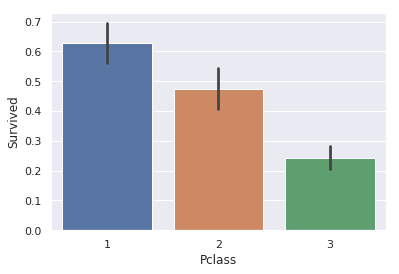

In [2714]:
sns.barplot(x='Pclass', y='Survived', data=train)

### Sex

In [2715]:
a = train.Sex.value_counts()
print(a)

per_m = round(a.values[0] * 100 / sum(a.values), 2)
per_f = round(a.values[1] * 100 / sum(a.values), 2)

print('\nThe percentage of male passengers is {}% and {}% for female\n'.format(per_m, per_f))

a = test.Sex.value_counts()
print(a)

per_m = round(a.values[0] * 100 / sum(a.values), 2)
per_f = round(a.values[1] * 100 / sum(a.values), 2)

print('\nThe percentage of male passengers is {}% and {}% for female\n'.format(per_m, per_f))


male      577
female    314
Name: Sex, dtype: int64

The percentage of male passengers is 64.76% and 35.24% for female

male      266
female    152
Name: Sex, dtype: int64

The percentage of male passengers is 63.64% and 36.36% for female



**Please note that the percentage of Male and Female is very similar test and train sample**

In [2716]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [2717]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [2718]:
a = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
d = {}
d[a.values[0][0]] = a.values[0][1]
d[a.values[1][0]] = a.values[1][1]
ratio = round(d['female'] / d['male'], 2)
print(ratio)



3.93


The rate of survival for female **3.93 time bigger** than is it for male
This feature will be important in our model

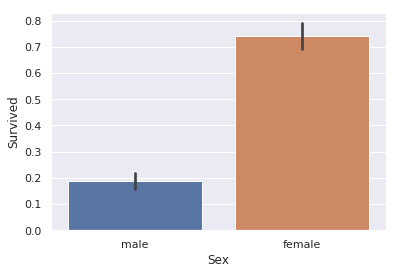

In [2719]:
sns.barplot(x='Sex', y='Survived', data=train)

### Sex repartition per class 

Text(0, 0.5, 'Percentage')

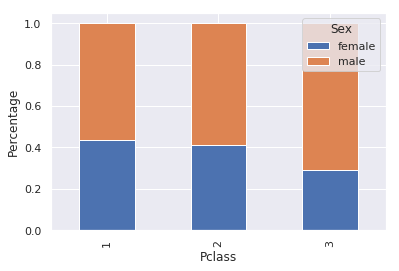

In [2720]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

In [2721]:
tab = pd.crosstab(train['Pclass'], train['Sex'])


total = {}
per_m = {}
per_f = {}
for i, (f, m) in enumerate(zip(tab.female, tab.male),1):
    total[i] = f + m
    per_m[i] = round((m / total[i]), 4) * 100
    per_f[i] = round((f / total[i]), 4) * 100


tot = pd.Series(total, name='total')
per_m = pd.Series(per_m, name='Male %')
per_f = pd.Series(per_f, name='Female %')


tab = pd.concat([tab, tot, per_m, per_f], axis=1)

print(tab)


        female  male  total  Male %  Female %
Pclass                                       
1           94   122    216   56.48     43.52
2           76   108    184   58.70     41.30
3          144   347    491   70.67     29.33


The percentage of womens in class 1 & 2 is similar but there is an over represenation of womens in the third class

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


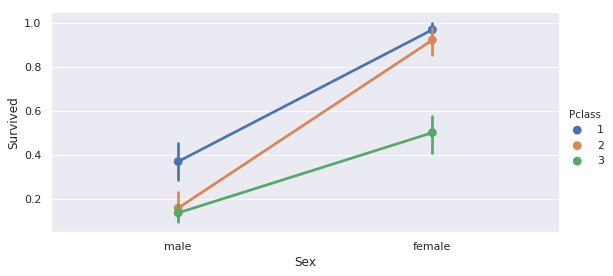

In [2722]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

### Embarked

Review Embarked feature: Where passenger boarded ship? 
 - S = Southhampton England
 - C = Cherbourg, France
 - Q = Queenstown / Cobh, Ireland

**Hypothesis:** 
Was thinking perhaps port would matter based on ability to swim and or class? 
Looked at median income, house value and distance from water but they are ports so all on the water. 
Highest income area was Cherbourg, France

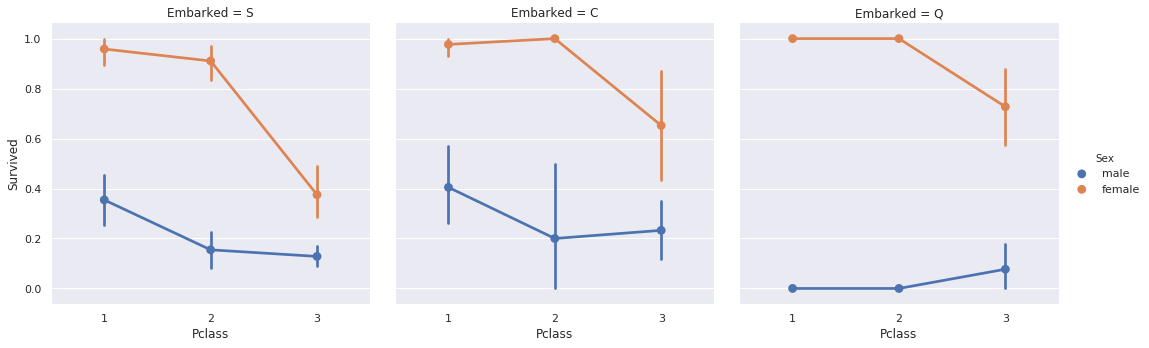

In [2723]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

### Embarked vs. survival

In [2724]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [2725]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [2726]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


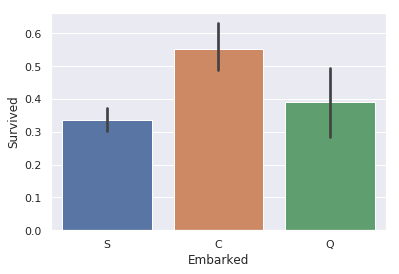

In [2727]:
sns.barplot(x='Embarked', y='Survived', data=train)

Sex       female  male
Embarked              
C             73    95
Q             36    41
S            203   441


Text(0, 0.5, 'Percentage')

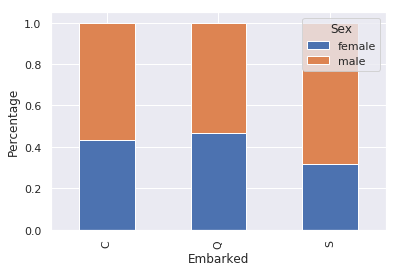

In [2728]:
tab = pd.crosstab(train['Embarked'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Percentage')

In [2729]:
train[['Embarked','Pclass','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Pclass,Survived
0,C,1.886905,0.553571
1,Q,2.909091,0.389610
2,S,2.350932,0.336957


Highest Pclass embarking from C

Conculsion: not a key feature as it is a lagging indicator for class and not as precise

### Parent child vs survival

Review Parch feature - Number of Parents/Children aboard

**Hypothesis:** 
More parents / children with the person the more likely to be saved. Culture + abilyt to lobby for the passenger


In [2730]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [2731]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [2732]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


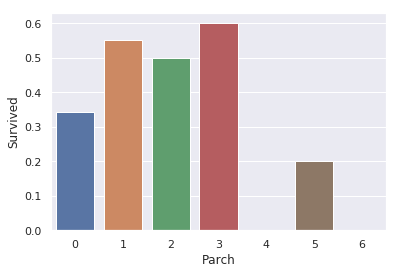

In [2733]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

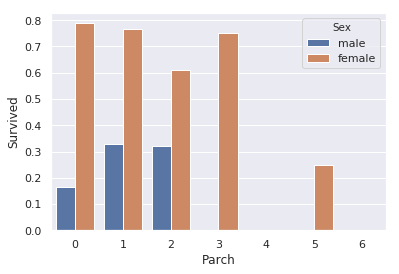

In [2734]:
sns.barplot(x='Parch', y='Survived', hue="Sex", ci=None, data=train) # ci=None will hide the error bar

We could see that when you have siblings aboard the titanic and if this category is statiscally significant, you chance of survival is higher

### Siblings

In [2735]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [2736]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [2737]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


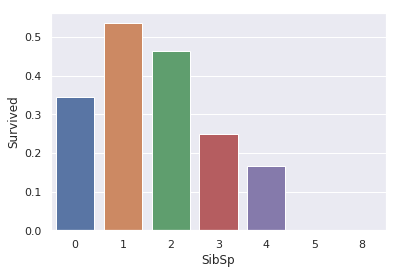

In [2738]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

### Cabin Features:

Please as noted earlier this is the field with the biggest number of missing data

In [2739]:
print('There is {} Null values'.format(train.Cabin.isnull().sum()))

There is 687 Null values


In [2740]:
print(train.Cabin.unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [2741]:
train['Cabin'].fillna('X', inplace=True)
train['Cabin'] = train['Cabin'].str[:1]
print(train.Cabin.unique())
train['Cabin'] = train['Cabin'].map( {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'X': 8} ).astype(int)

['X' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [2742]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,8,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,8,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,8,S


### Age vs. Survival

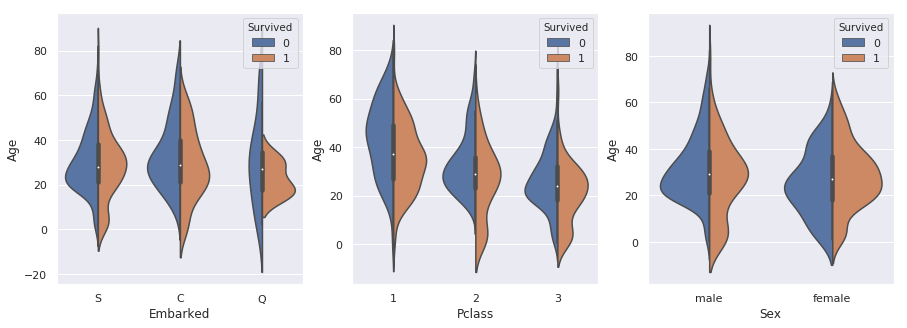

In [2743]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

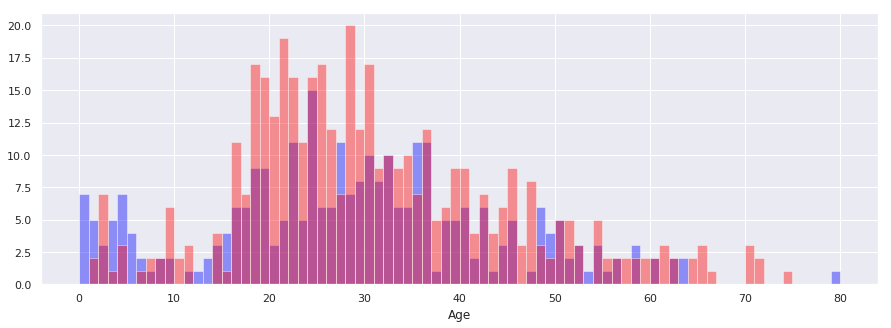

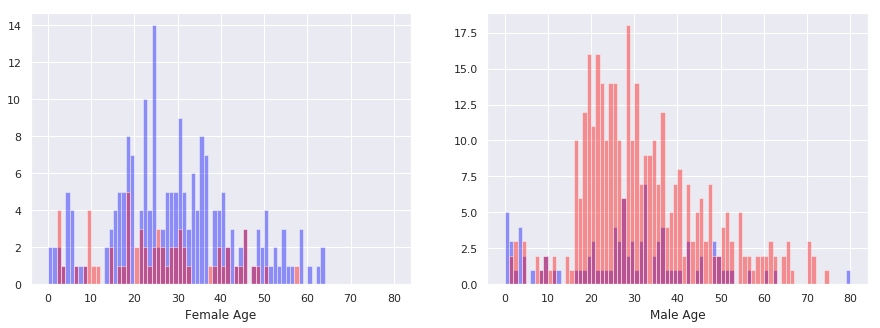

In [2744]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

## Ploting Heatmap

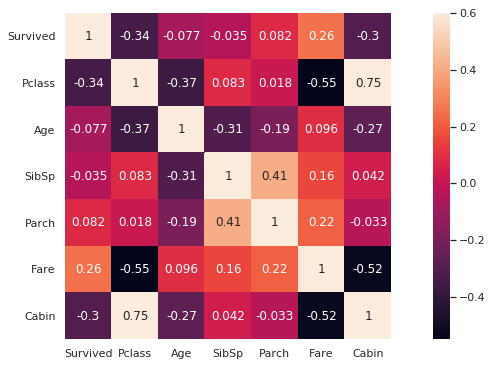

In [2745]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

## Generating Features

In order to stay consistance, we will generate feature at the same time on both the test and the train sets.

In [2746]:
train_test_data = [train, test] # combining train and test dataset
dataset_name = ['train', 'test']

In [2747]:
# Generating a new feature => Title
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
    

In [2748]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,8,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,8,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,8,S,Mr


In [2749]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


### Title

In [2750]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [2751]:
pd.crosstab(train['Title'], train['Age'])

Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,62.0,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0
Title,,,,,,,,,,,,,,,,,,,,,
Capt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Col,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Countess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Don,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jonkheer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lady,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Major,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Master,1,1,0,2,1,5,4,4,5,0,...,0,0,0,0,0,0,0,0,0,0


In [2752]:
train.groupby('Title').Survived.value_counts()

Title     Survived
Capt      0             1
Col       0             1
          1             1
Countess  1             1
Don       0             1
Dr        0             4
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    1            23
          0            17
Miss      1           127
          0            55
Mlle      1             2
Mme       1             1
Mr        0           436
          1            81
Mrs       1            99
          0            26
Ms        1             1
Rev       0             6
Sir       1             1
Name: Survived, dtype: int64

In [2753]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [2754]:
for dataset in train_test_data:
    # dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Dona'], 'VIP_W')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Jonkheer', 'Sir'], 'VIP_M')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Major'], 'Mil')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Mil,0.400000
3,Miss,0.702703
4,Mr,0.156673
5,Mrs,0.793651
6,Rev,0.000000
7,VIP_M,0.333333
8,VIP_W,1.000000


In [2755]:
for dataset, name in zip(train_test_data, dataset_name):
    print('{} set\n'.format(name))
    print(dataset['Title'].value_counts())
    print('\n')

train set

Mr        517
Miss      185
Mrs       126
Master     40
Dr          7
Rev         6
Mil         5
VIP_M       3
VIP_W       2
Name: Title, dtype: int64


test set

Mr        240
Miss       79
Mrs        72
Master     21
Mil         2
Rev         2
VIP_W       1
Dr          1
Name: Title, dtype: int64




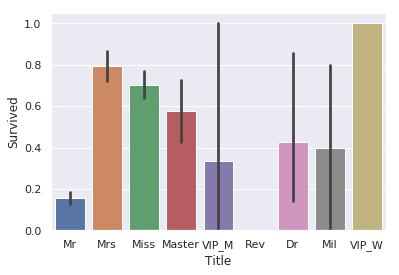

In [2756]:
sns.barplot(x='Title', y='Survived', data=train)

In [2757]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "VIP_M": 5, "VIP_W":6, "Mil":8, "Dr":9}

def title_to_int(train_test_data, title_mapping):
    for dataset in train_test_data:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)
        dataset['Title'] = dataset['Title'].astype(int)

print(train['Title'].unique())
title_to_int(train_test_data, title_mapping)
print(train['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'VIP_M' 'Rev' 'Dr' 'Mil' 'VIP_W']
[1 3 2 4 5 0 9 8 6]


In [2758]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0,0.000000
1,1,0.156673
2,2,0.702703
3,3,0.793651
4,4,0.575000
5,5,0.333333
6,6,1.000000
7,8,0.400000
8,9,0.428571


In [2759]:
# Changing sex value to numerical values

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,8,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,8,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,8,S,1


### Embarked

In [2760]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [2761]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [2762]:
for dataset in train_test_data:
    dataset['Embarked'].fillna('S', inplace=True)

In [2763]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,8,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,8,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,8,S,1


In [2764]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [2765]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,8,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,8,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,8,0,1


### Age Band

In [2766]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,8,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,8,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,8,0,1


In [2767]:
#Age
def prepare_age_default(train_test_data):
    for dataset in train_test_data:
        age_avg = dataset['Age'].mean()
        age_std = dataset['Age'].std()
        age_null_count = dataset['Age'].isnull().sum()
    
        age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
        dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
        dataset['Age'] = dataset['Age'].astype(int)
    

    for dataset in train_test_data:
        dataset.loc[dataset['Age'] <= 5, 'Age'] = 0
        dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 10), 'Age'] = 1
        dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 16), 'Age'] = 2
        dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 3
        dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 4
        dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 5
        dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 70), 'Age'] = 6
        dataset.loc[(dataset['Age'] > 70) & (dataset['Age'] <= 75), 'Age'] = 7
        dataset.loc[ dataset['Age'] > 75, 'Age'] = 8

prepare_age_default(train_test_data)

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [2768]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,8,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4,1,0,PC 17599,71.2833,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,8,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,53.1000,2,0,3
4,5,0,3,"Allen, Mr. William Henry",0,4,0,0,373450,8.0500,8,0,1


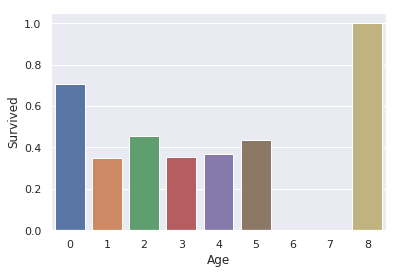

In [2769]:
sns.barplot(x='Age', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

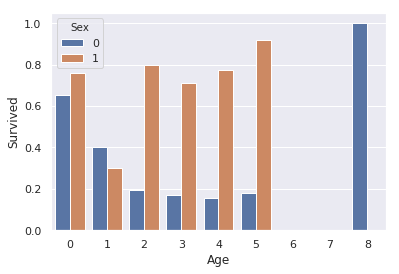

In [2770]:
sns.barplot(x='Age', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

### Fare features

In [2771]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [2772]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,8,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4,1,0,PC 17599,71.2833,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,8,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,53.1000,2,0,3
4,5,0,3,"Allen, Mr. William Henry",0,4,0,0,373450,8.0500,8,0,1


In [2773]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [2774]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,8,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4,1,0,PC 17599,3,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,1,8,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,3,2,0,3
4,5,0,3,"Allen, Mr. William Henry",0,4,0,0,373450,1,8,0,1


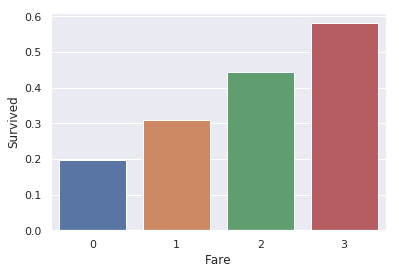

In [2775]:
sns.barplot(x='Fare', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error ba

### Family Size

In [2776]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


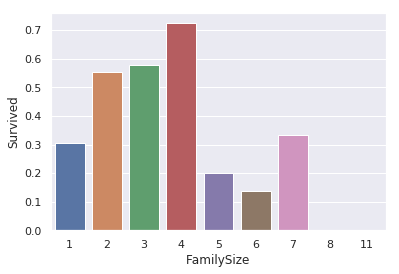

In [2777]:
sns.barplot(x='FamilySize', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

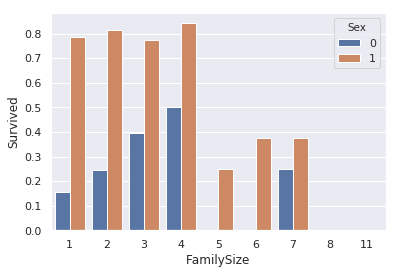

In [2778]:
sns.barplot(x='FamilySize', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [2779]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [2780]:
def prepare_family_size_buckets(train_test_data):
    for dataset in train_test_data:
        dataset['FamilyBucket'] = 0
        dataset.loc[(dataset['FamilySize'] > 1) & (dataset['FamilySize'] <= 4), 'FamilyBucket'] = 1
        dataset.loc[(dataset['FamilySize'] > 4), 'FamilyBucket'] = 2
prepare_family_size_buckets(train_test_data)

In [2781]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FamilyBucket
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,8,0,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4,1,0,PC 17599,3,2,1,3,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,1,8,0,2,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,3,2,0,3,2,0,1
4,5,0,3,"Allen, Mr. William Henry",0,4,0,0,373450,1,8,0,1,1,1,0


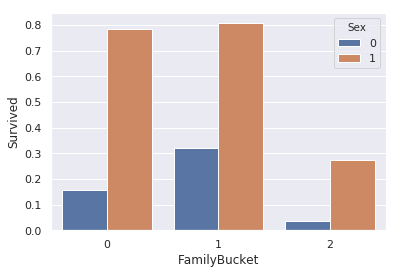

In [2782]:
sns.barplot(x='FamilyBucket', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

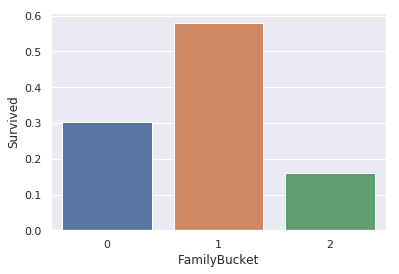

In [2783]:
sns.barplot(x='FamilyBucket', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

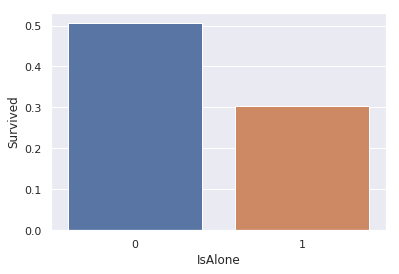

In [2784]:
sns.barplot(x='IsAlone', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [2785]:
train_test_data[0].Ticket.nunique()

681

In [2786]:
train_tickets = train_test_data[0][["Ticket", "PassengerId"]]
test_tickets = train_test_data[1][["Ticket", "PassengerId"]]
tickets = pd.concat([train_tickets, test_tickets])

In [2787]:
ppl_per_ticket = tickets.groupby(train_test_data[0].Ticket)[["PassengerId"]].count()

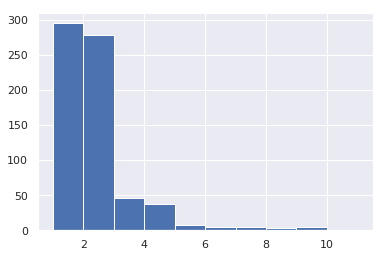

In [2788]:
ppl_per_ticket.PassengerId.hist()

In [2789]:
for dataset in train_test_data:
    dataset["TicketShared"] = dataset["Ticket"].map(ppl_per_ticket["PassengerId"])

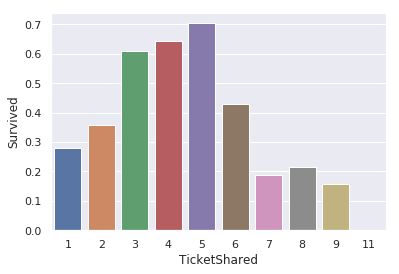

In [2790]:
sns.barplot(x='TicketShared', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

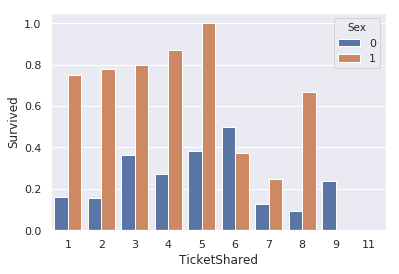

In [2791]:
sns.barplot(x='TicketShared', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [2792]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FamilyBucket,TicketShared
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,8,0,1,2,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4,1,0,PC 17599,3,2,1,3,2,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,1,8,0,2,1,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,3,2,0,3,2,0,1,4
4,5,0,3,"Allen, Mr. William Henry",0,4,0,0,373450,1,8,0,1,1,1,0,2


In [2793]:

'''
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)
'''

"\nfeatures_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']\ntrain = train.drop(features_drop, axis=1)\ntest = test.drop(features_drop, axis=1)\n\ntrain = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)\n"

# Trying different ML methods:

In [2794]:

X_test = train_test_data[1][['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilyBucket']]

X_train = train_test_data[0][['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilyBucket']]
y_train = train_test_data[0]['Survived']

result_dict = {}

X_train.shape, y_train.shape, X_test.shape


((891, 7), (891,), (418, 7))

In [2795]:
def train_baseline_models(X_train, y_train):
    classifiers = {
        'Logistic regression': LogisticRegression(solver="liblinear"),
        'Naive Bayes': GaussianNB(),
        'Support Vector Machines': SVC(gamma="auto"),
        'Linear SVC': LinearSVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random forest': RandomForestClassifier(n_estimators=100),
        'Stochastic Gradient Descent': SGDClassifier(max_iter=5, tol=None),
        'Perceptron': Perceptron(max_iter=5, tol=None)
    }
    scores = {}
    for clf_name, clf in classifiers.items():
        scores[clf_name] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

def train_knn(X_train, y_train):
    scores = {}
    for k in [1, 3, 5, 7, 9, 11, 13]:
        clf = KNeighborsClassifier(n_neighbors = k)
        scores[k] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

def train_decision_tree(X_train, y_train):
    scores = {}
    X_train_standarized = (X_train - X_train.mean()) / X_train.std()
    for min_sample_leaf in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
        clf = DecisionTreeClassifier(min_samples_leaf=min_sample_leaf)
        scores[min_sample_leaf] = np.mean(cross_val_score(clf, X_train_standarized, y_train, cv=5))
    return scores

def train_decision_tree_max_depth(X_train, y_train):
    scores = {}
    for max_depth in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
        clf = DecisionTreeClassifier(max_depth=max_depth)
        scores[max_depth] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

def train_descision_tree_combo(X_train, y_train):
    scores = {}
    for max_depth in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
        scores[max_depth] = {}
        for min_sample_leaf in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_sample_leaf)
            scores[max_depth][min_sample_leaf] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

def get_dataset(train, test):
    return [train.copy(), test.copy()]

In [2796]:
train_test_data = get_dataset(train, test)
scores = train_baseline_models(X_train, y_train)

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:9

In [2797]:
scores

{'Logistic regression': 0.8002488131195726,
 'Naive Bayes': 0.7666347493622746,
 'Support Vector Machines': 0.831666044279231,
 'Linear SVC': 0.8002298400552951,
 'Decision Tree': 0.8149123320307528,
 'Random forest': 0.8070786197680888,
 'Stochastic Gradient Descent': 0.7465416359462611,
 'Perceptron': 0.6421715895562324}

In [2798]:
knn_scores = train_knn(X_train, y_train)

In [2799]:
knn_scores

{1: 0.782415657636552,
 3: 0.8115792079330815,
 5: 0.8283452615392581,
 7: 0.8272469870951247,
 9: 0.8216161717179347,
 11: 0.8115100892372367,
 13: 0.8103864228042756}

In [2800]:
train_descision_tree_combo(X_train, y_train)

{3: {3: 0.8271778683992798,
  5: 0.8249432315277714,
  7: 0.8238196360221535,
  9: 0.8238196360221535,
  11: 0.8238196360221535,
  13: 0.8283013929775546,
  15: 0.8283013929775546,
  17: 0.8271840745418004,
  19: 0.8271840745418004},
 5: {3: 0.7969407973013565,
  5: 0.7913416509828579,
  7: 0.7924590403459553,
  9: 0.7857552715861164,
  11: 0.7924905675499603,
  13: 0.7969723245053616,
  15: 0.7958487289997437,
  17: 0.7947314105639894,
  19: 0.7947314105639894},
 7: {3: 0.8216414218520761,
  5: 0.8227777133521078,
  7: 0.8137952263770277,
  9: 0.8104686630585928,
  11: 0.8172039590224369,
  13: 0.8126461679552393,
  15: 0.8115225724496213,
  17: 0.8104052540138671,
  19: 0.8104052540138671},
 9: {3: 0.8183020916118842,
  5: 0.8182831894749498,
  7: 0.8115416873685849,
  9: 0.8070788325501181,
  11: 0.8172039590224369,
  13: 0.8126461679552393,
  15: 0.8115225724496213,
  17: 0.8104052540138671,
  19: 0.8104052540138671},
 11: {3: 0.8182894665448135,
  5: 0.819400507910704,
  7: 0.8126

In [2801]:
train_decision_tree_max_depth(X_train, y_train)

{3: 0.8271778683992798,
 5: 0.8048313578295098,
 7: 0.8227902674918353,
 9: 0.8160359275363707,
 11: 0.8093005606451834,
 13: 0.8104304332206652,
 15: 0.8115477516564195,
 17: 0.8093131147849111,
 19: 0.8093068377150473}

## Boost Logistic Regression

In [2802]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FamilyBucket,TicketShared
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,8,0,1,2,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4,1,0,PC 17599,3,2,1,3,2,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,1,8,0,2,1,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,3,2,0,3,2,0,1,4
4,5,0,3,"Allen, Mr. William Henry",0,4,0,0,373450,1,8,0,1,1,1,0,2


In [2803]:
train_test_data[0].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FamilyBucket,TicketShared
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,3.244669,0.523008,0.381594,1.505051,6.716049,0.361392,1.745230,1.904602,0.602694,0.466891,2.630752
std,257.353842,0.486592,0.836071,0.477990,1.132097,1.102743,0.806057,1.118148,2.460739,0.635673,1.232139,1.613459,0.489615,0.623305,2.090513
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.500000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,4.000000,1.000000,0.000000,2.000000,8.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,8.000000,6.000000,3.000000,8.000000,2.000000,9.000000,11.000000,1.000000,2.000000,11.000000


In [2804]:
for dataset in train_test_data:
    for title in train_test_data[0].Title.unique():
        feature_name = "Title_%s" % title
        print(feature_name)
        dataset[feature_name] = 0
        dataset.loc[dataset['Title'] == title, feature_name] = 1

Title_1
Title_3
Title_2
Title_4
Title_5
Title_0
Title_9
Title_8
Title_6
Title_1
Title_3
Title_2
Title_4
Title_5
Title_0
Title_9
Title_8
Title_6


In [2805]:
for dataset in train_test_data:
    dataset['S'] = 0
    dataset.loc[dataset['Embarked'] == 0, 'S'] = 1
    dataset['C'] = 0
    dataset.loc[dataset['Embarked'] == 1, 'C'] = 1
    dataset['Q'] = 0
    dataset.loc[dataset['Embarked'] == 2, 'Q'] = 1

In [2806]:
for dataset in train_test_data:
    dataset['SmallFamily'] = 0
    dataset['LargeFamily'] = 0
    dataset.loc[dataset['FamilyBucket'] == 1, 'SmallFamily'] = 1
    dataset.loc[dataset['FamilyBucket'] == 2, 'LargeFamily'] = 1

In [2807]:
train_test_data[0].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'IsAlone', 'FamilyBucket', 'TicketShared', 'Title_1', 'Title_3',
       'Title_2', 'Title_4', 'Title_5', 'Title_0', 'Title_9', 'Title_8',
       'Title_6', 'S', 'C', 'Q', 'SmallFamily', 'LargeFamily'],
      dtype='object')

In [2808]:
columns_used = ['Pclass', 'Sex', 'Age', 'Fare', 'S', 'C', 'Q', 'IsAlone', 'SmallFamily', 'LargeFamily',
                'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_8', 'Title_9']

X_train = train_test_data[0][columns_used]
y_train = train_test_data[0]['Survived']

In [2809]:
clf = LogisticRegression()
np.mean(cross_val_score(clf, X_train, y_train, cv=5))

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linea

0.8193566393490004

In [2810]:
clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_pred = model.predict(train_test_data[1][columns_used])

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [2811]:
columns_used

['Pclass',
 'Sex',
 'Age',
 'Fare',
 'S',
 'C',
 'Q',
 'IsAlone',
 'SmallFamily',
 'LargeFamily',
 'Title_0',
 'Title_1',
 'Title_2',
 'Title_3',
 'Title_4',
 'Title_5',
 'Title_8',
 'Title_9']

In [2812]:
model.coef_

array([[-0.91,  1.69, -0.3 ,  0.18, -0.04,  0.37,  0.37,  1.24,  0.9 ,
        -1.44, -0.87, -0.79,  0.36,  0.87,  1.81, -0.36, -0.2 , -0.35]])

In [2813]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA()
np.mean(cross_val_score(clf, X_train, y_train, cv=5))

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.8260668270333895

In [2814]:
scores = train_baseline_models(X_train, y_train)

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/svm/base.py:9

In [2815]:
scores

{'Logistic regression': 0.8193566393490004,
 'Naive Bayes': 0.5015568906445771,
 'Support Vector Machines': 0.8327959877820559,
 'Linear SVC': 0.8227022466590561,
 'Decision Tree': 0.8104367812178721,
 'Random forest': 0.8081769651395655,
 'Stochastic Gradient Descent': 0.7946874001475998,
 'Perceptron': 0.6437171672895861}

In [2816]:
tree_combo_results = train_descision_tree_combo(X_train, y_train)

In [2817]:
results_all = []
for depth, min_leafs in tree_combo_results.items():
    for leaf in min_leafs:
        results_all.append((tree_combo_results[depth][leaf], depth, leaf))
results_all.sort()
results_all

[(0.7812543997117511, 5, 19),
 (0.7857487817342232, 5, 17),
 (0.7868661001699774, 5, 15),
 (0.7879834186057316, 5, 13),
 (0.7913416509828579, 5, 5),
 (0.7935701526391887, 5, 9),
 (0.7935889129214371, 5, 3),
 (0.7958487999270867, 5, 11),
 (0.7969282431616289, 7, 19),
 (0.7969282431616289, 9, 19),
 (0.7969282431616289, 13, 19),
 (0.7969282431616289, 15, 19),
 (0.7969282431616289, 19, 19),
 (0.7969535642231133, 5, 7),
 (0.7980455615973832, 11, 19),
 (0.7980455615973832, 17, 19),
 (0.8014226251841008, 7, 17),
 (0.8014226251841008, 9, 17),
 (0.8014226251841008, 11, 15),
 (0.8014226251841008, 11, 17),
 (0.8014226251841008, 15, 17),
 (0.8014226251841008, 17, 17),
 (0.8014226251841008, 19, 15),
 (0.8014226251841008, 19, 17),
 (0.8025399436198549, 7, 13),
 (0.8025399436198549, 7, 15),
 (0.8025399436198549, 9, 13),
 (0.8025399436198549, 9, 15),
 (0.8025399436198549, 13, 13),
 (0.8025399436198549, 13, 15),
 (0.8025399436198549, 13, 17),
 (0.8025399436198549, 15, 13),
 (0.8025399436198549, 15, 15)

In [2818]:
train_test_data[0].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'IsAlone', 'FamilyBucket', 'TicketShared', 'Title_1', 'Title_3',
       'Title_2', 'Title_4', 'Title_5', 'Title_0', 'Title_9', 'Title_8',
       'Title_6', 'S', 'C', 'Q', 'SmallFamily', 'LargeFamily'],
      dtype='object')

/Users/guillaumethomas/.virtualenvs/ML/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


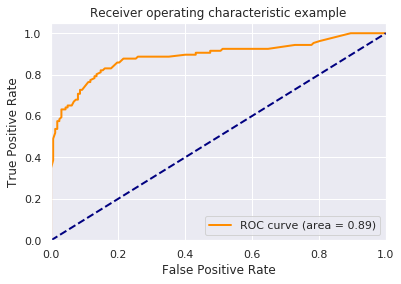

In [2820]:

used_colums = ['Pclass', 'Sex', 'Age',
       'Fare', 
       'FamilyBucket', 'IsAlone', 'Title_1', 'Title_3', 'Title_2', 'Title_4',
       'Title_6', 'Title_0', 'Title_8', 'Title_5', 'Title_9', 'S', 'C', 'Q',
       'SmallFamily', 'LargeFamily']
X_train = train_test_data[0][used_colums]
y_train = train_test_data[0]['Survived']

from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_train, y_train, test_size=0.3)
clf = LogisticRegression()
model = clf.fit(X_train_f, y_train_f)
y_prob = clf.predict_proba(X_test_f)
model.score(X_test_f, y_test_f)


from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_f, [prob[1] for prob in y_prob])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Decsion tree

In [2821]:
X_train = train_test_data[0][used_colums]
y_train = train_test_data[0]['Survived']

clf = DecisionTreeClassifier(min_samples_leaf=10)
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_train, y_train, test_size=0.3)
clf = DecisionTreeClassifier(min_samples_leaf = 10)
model = clf.fit(X_train_f, y_train_f)
y_prob = clf.predict_proba(X_test_f)
model.score(X_test_f, y_test_f)

[0.78 0.84 0.78 0.8  0.85 0.83 0.82 0.75 0.87 0.83]


0.8134328358208955

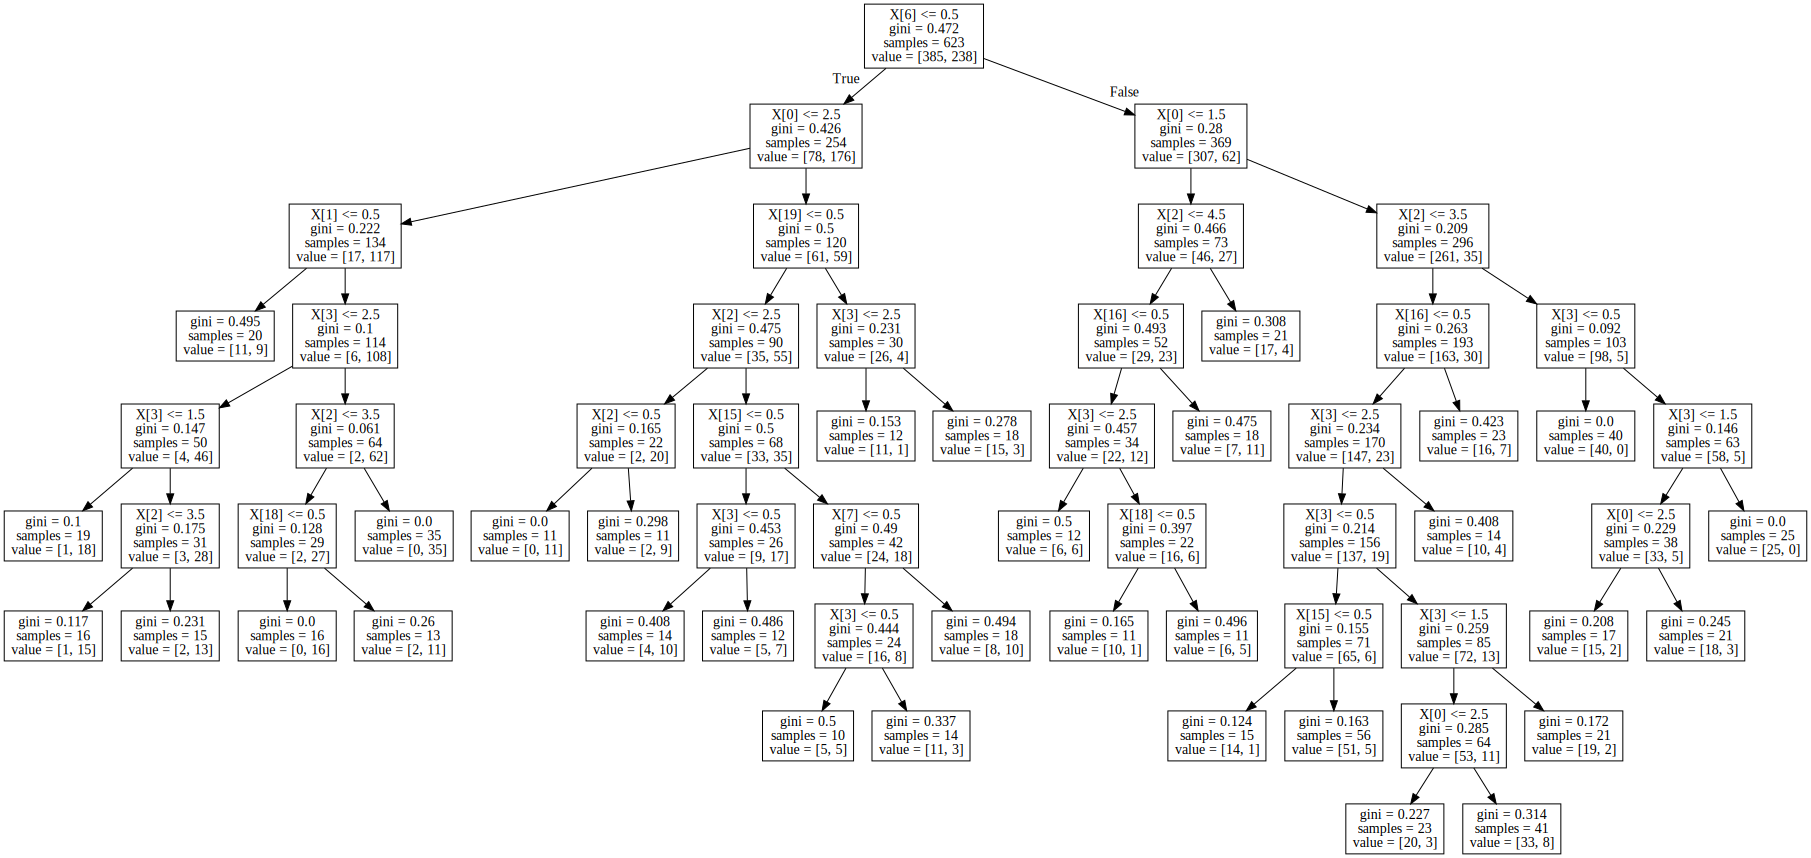

In [2824]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph

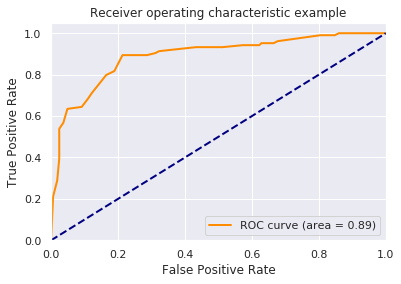

In [2826]:
fpr, tpr, thresholds = roc_curve(y_test_f, [prob[1] for prob in y_prob])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [2828]:
train_decision_tree_max_depth(X_train, y_train)

{3: 0.8215723740835745,
 5: 0.7958677729913642,
 7: 0.8216730199834243,
 9: 0.8205365866287064,
 11: 0.8149122611034096,
 13: 0.8126776951592444,
 15: 0.8126840431564512,
 17: 0.8115540996536262,
 19: 0.8137950135949985}

In [2830]:
tree_combo_results = train_descision_tree_combo(X_train, y_train)

In [2832]:
results_all = []
for depth, min_leafs in tree_combo_results.items():
    for leaf in min_leafs:
        results_all.append((tree_combo_results[depth][leaf], depth, leaf))
results_all.sort()
results_all

[(0.7823717181475054, 5, 19),
 (0.7857487817342232, 5, 17),
 (0.7868661001699774, 5, 13),
 (0.7868661001699774, 5, 15),
 (0.7913416509828579, 5, 5),
 (0.7935701526391887, 5, 9),
 (0.7935889129214371, 5, 3),
 (0.7958487999270867, 5, 11),
 (0.7969282431616289, 7, 19),
 (0.7969282431616289, 11, 19),
 (0.7969282431616289, 13, 19),
 (0.7969282431616289, 15, 19),
 (0.7969535642231133, 5, 7),
 (0.7980455615973832, 9, 19),
 (0.7980455615973832, 17, 19),
 (0.7980455615973832, 19, 19),
 (0.8014226251841008, 9, 17),
 (0.8014226251841008, 11, 15),
 (0.8014226251841008, 11, 17),
 (0.8014226251841008, 13, 15),
 (0.8014226251841008, 13, 17),
 (0.8014226251841008, 15, 15),
 (0.8014226251841008, 15, 17),
 (0.8014226251841008, 17, 15),
 (0.8014226251841008, 17, 17),
 (0.8014226251841008, 19, 17),
 (0.8025399436198549, 7, 13),
 (0.8025399436198549, 7, 15),
 (0.8025399436198549, 7, 17),
 (0.8025399436198549, 9, 13),
 (0.8025399436198549, 9, 15),
 (0.8025399436198549, 13, 13),
 (0.8025399436198549, 15, 13)

## Export to CSV:

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.to_csv.html

#Find Best Results
import operator

# max(result_dict.items(), key=operator.itemgetter(1)[0])[0]

# Hard coded for now 
model_pred = y_pred_decision_tree

survived = pd.DataFrame(model_pred,columns=["Survived"])
Id = test['PassengerId'].to_frame("PassengerId")


results = pd.concat([Id, survived], axis=1)
results.to_csv('result.csv', index=False)


## In Work

In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
from sklearn.ensemble import BaggingClassifier 
'''
for j in [50,200, 400, 600]:
    clf_stump = DecisionTreeClassifier(max_features=None,max_leaf_nodes=j)
    print(j)
    for i in np.arange(1,total):
        print(i)
        baglfy=BaggingClassifier(base_estimator=clf_stump,n_estimators=i,
            max_samples=1.0)
        baglfy=baglfy.fit(X_train, y_train)
        # bag_tr_err=y==baglfy.predict(X_)
'''

# final_dt = DecisionTreeClassifier(max_leaf_nodes=10, max_depth=5) 
final_dt = DecisionTreeClassifier() 
final_bc = BaggingClassifier(base_estimator=final_dt, n_estimators=40, random_state=1, oob_score=True)

final_bc.fit(X_train, y_train)
final_preds = final_bc.predict(X_test)

acc_oob = final_bc.oob_score_
print(acc_oob) 

acc_bc = round(final_bc.score(X_train, y_train) * 100, 2)
print (acc_bc)


In [ ]:
# https://www.kaggle.com/theopainvin/bagging-and-boosting-titanic-passengers
from sklearn.model_selection import train_test_split

from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)

from sklearn.metrics import accuracy_score

X_dev, X_eval, y_dev, y_eval = train_test_split(X_train,
                                                y_train,
                                                test_size=0.2,random_state=42)
                                                
                                                
# Use them without any hyperparameters tuning
models = [RandomForestClassifier(random_state=77),
          GradientBoostingClassifier(random_state=77),
          AdaBoostClassifier(random_state=77)]

from sklearn.model_selection import cross_val_score, GridSearchCV

for model in models:
    score = cross_val_score(model, X_dev, y_dev, cv=5)
    msg = ("{0}:\n\tMean accuracy on development set\t= {1:.3f} "
           "(+/- {2:.3f})".format(model.__class__.__name__,
                                  score.mean(),
                                  score.std()))
    print(msg)
    
    # Fit the model on the dev set and predict and eval independent set
    model.fit(X_dev, y_dev)
    pred_eval = model.predict(X_eval)
    acc_eval = accuracy_score(y_eval, pred_eval)
    print("\tAccuracy on evaluation set\t\t= {0:.3f}".format(acc_eval))